Après avoir appliqué le modèle de régression multiple (cf. Kernel Jupyter Regression_Multiple_Assurance_Maladie), nous avons émis l'hypothèse suivante : Ce sont les Américains dont l'IMC est élevé qui représentent la catégorie d'individus dépensant davantage pour une couverture santé.

# 1. Importer les librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Chargement des données

In [2]:
# Importer le dataset 
dataset = pd.read_csv("insurance3r2.csv")

In [3]:
# Isoler lignes et colonnes
x = dataset.drop(['insuranceclaim'], axis=1)
y = dataset['insuranceclaim']

In [4]:
# Afficher les 5 premières lignes des données
x.head()

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [5]:
# Afficher le type de données
x.dtypes

age           int64
sex           int64
bmi         float64
steps         int64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

On remarque que les colonnes "bmi" et "charges" sont de type float64.

In [6]:
# Convertir "bmi" format float 64 en integer et afficher le type de données
x["bmi"]= x.bmi.astype(int)
x["charges"]= x.bmi.astype(int)
x.dtypes

age         int64
sex         int64
bmi         int32
steps       int64
children    int64
smoker      int64
region      int64
charges     int32
dtype: object

# 3. Analyse exploratoire

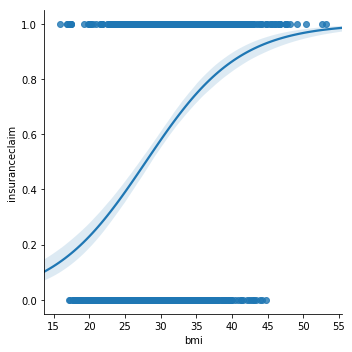

In [7]:
# Visualisation exploratoire
#sns.lmplot(x="children", y= "insuranceclaim", data = dataset, logistic = True)
sns.lmplot(x="bmi", y= "insuranceclaim", data = dataset, logistic = True)

Observation : que la méthode de régression logistique est caractérisée par une courbe sigmoide. Les valeurs proche de 0 représentent le "NON", les valeurs proches de 1 représentent le "OUI". De plus, nous remarquons que la valeur de bmi proche de 1 est à environ 53. Ce qui confirme le calcul du bmi maximum dans le précédant modèle de régression multiple (cf. Kernel Jupyter Regression_Multiple_Assurance_Maladie).

# 4. Mise en place du modèle de Régression Logistique

In [8]:
# Séparer le dataset en train et en test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state =0)

In [9]:
# Pour résoudre les problèmes de Warning (optionnel)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Importer le modèle regeression logistique
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# predire les résultats
y_pred = classifier.predict(x_test)

In [11]:
# somme des résultats de la prédiction
np.sum(y_pred)

149

In [12]:
# Afficher le degré de précision pour la prédiction
from sklearn.metrics import accuracy_score
print("Accuracy score : {}".format(round(accuracy_score(y_test, y_pred),4)))

Accuracy score : 0.8955


Nous pouvons prédire à 89.5% que ce sont les Améericains dont l'IMC est élevé qui dépensent le plus pour bénécficier d'une assurance santé.

### 4.a) Matrice  de confusion

In [13]:
# 1ère méthode : Matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[107,  12],
       [ 16, 133]], dtype=int64)

In [14]:
# 2ème méthode : Matrice de confusion
x_confusion = pd.crosstab(y_pred, y_test)
x_confusion

insuranceclaim,0,1
row_0,,
0,107,12
1,16,133


Même résultats de prédiction que dans la 1ère méthode. Les valeurs "107" et "133" sont respectivement les "vrai négatifs" et les "vrai positifs". Les valeurs "12" et "16" sont respectivement les "faux négatifs" et les "faux positifs". Résultat de prédiction : 107+133/268 = 89.5% de chance que ce sont les américains obèses qui dépensent davantage pour une couverture santé. Donc, ce calcul correspond à celui donné précedemment par l'accuracy. Le modèle de prédiction utilisé convient à cette étude.

###  4.b) Courbe ROC (caractéristique de performance)

In [15]:
# Courbe ROC (Receiving Operator Characteristic)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [16]:
# On calcule le ROC pour évaluer la caractéristique de performance du test
logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])

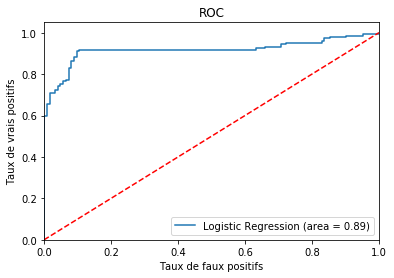

In [17]:
# on ajoute faux positif, faux negatif et un label
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Résultat : visiblement, l'aire sous la courbe ROC est grande, la courbe s’écarte de la ligne du classificateur aléatoire et se rapproche du coude du classificateur idéal (qui passe de (0, 0) à (0, 1) et se rapproche de (1, 1)). Nous observons le résultat de l'air "0.89", ce qui correspond au résultat de prédiction. Donc, nous pouvons dire que notre modèle de prédiction est bon.

# 5. Prédiction réelle

In [18]:
# somme des résultats réels
np.sum(y_test)

145

Résultats réels : 145/268 = 54.1% de chance que ce sont les Américains dont l'IMC est élevé qui dépensent davantage en Assurance Santé.

# 6. Conclusion générale et Perspectives

Avec le modèle de régression multiple nous pouvons prédire à 68% le montant des charges de couverture santé. La quantité et la qualité des données ne permettent pas d'avoir une meilleure prédiction (entre 80% et 90% si possible). En effet, il manque les données du Nord Est. Par conséquent, il est nécessaire d'ajouter d'autres données dans l'avenir. Quand à la régression logistique, si on prédit toujours à 54.1% de chance que c'est la catégorie d'Américains dont l'IMC est elevé, qui dépensent davantage en couverture santé, soit un taux de précision de : 89.5 - 54.1 = 35.4% meilleur que si on prédit à 89.5%.

Malgré les 215 milliards de dollars dépensés chaque année, il semblerait que les pouvoirs publics ne s'investissent pas suffisamment. De plus, les assureurs privés ont tendance à rejeter les dossiers car considérés comme non , comme des opérations de rhinoplasties. Pourtant l'obésité est reconnue comme maladie chronique par l'OMS. Les assureurs comme Obamacare et Medicaid ne couvrent pas non plus les cas d'obésité. Il serait préférable de mener une enquête publique pour interroger tous les Américains dont les dossiers ont été rejetés par les compagnies d'assurances. La fixation d'un tarif abordable par les pouvoirs publics pour garantir une couverture santé, serait une solution idéale.